In [16]:
#1
import numpy as np
import scipy.stats as stats

hrs_m = [8, 10, 12, 9, 11, 10, 8, 9, 11, 10, 12, 11, 10, 9, 11, 12, 9, 10, 11, 8, 10, 12, 11, 10, 9, 11, 10, 12, 11, 10, 9, 11, 8, 10, 12, 11, 10, 9, 11, 10, 12, 11, 10, 9, 11, 10, 12, 11, 10, 9]
hrs_f = [10, 9, 8, 11, 10, 12, 11, 10, 9, 11, 12, 9, 10, 11, 8, 10, 12, 11, 10, 9, 11, 10, 12, 11, 10, 9, 11, 10, 12, 11, 10, 9, 11, 8, 10, 12, 11, 10, 9, 11, 10, 12, 11, 10, 9, 11, 10, 12, 11, 10]

tstat, pval = stats.ttest_ind(hrs_m, hrs_f)

print("t-statistic:", tstat)
print("p-value:", pval)

t-statistic: -0.3488571842303581
p-value: 0.7279449319037434


<Figure size 1000x600 with 0 Axes>

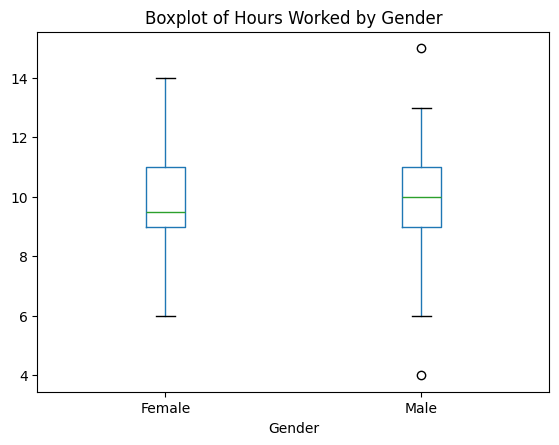

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,50.0,9.70,1.775686,6.0,9.0,9.5,11.0,14.0
Male,50.0,9.82,2.154161,4.0,9.0,10.0,11.0,15.0


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

m = [12, 7, 7, 10, 8, 10, 11, 9, 9, 13, 4, 9, 12, 11, 9, 9, 7, 12, 10, 13, 11, 10, 6, 12, 11, 9, 10, 12, 8, 9, 13, 10, 9, 7, 10, 7, 10, 8, 11, 10, 11, 7, 15, 8, 9, 9, 11, 13, 10, 13]
f = [11, 10, 11, 10, 11, 12, 12, 10, 9, 9, 9, 10, 8, 7, 12, 9, 7, 8, 9, 8, 7, 7, 9, 9, 12, 10, 9, 13, 9, 9, 10, 9, 6, 12, 8, 11, 8, 8, 11, 12, 9, 10, 11, 14, 12, 7, 11, 10, 9, 11]

m_df = pd.DataFrame({'Hours': m, 'Gender': 'Male'})
f_df = pd.DataFrame({'Hours': f, 'Gender': 'Female'})

combined_df = pd.concat([m_df, f_df])

stat_summ = combined_df.groupby('Gender')['Hours'].describe()

plt.figure(figsize=(10, 6))
combined_df.boxplot(by='Gender', column='Hours', grid=False)
plt.title('Boxplot of Hours Worked by Gender')
plt.suptitle('') 
plt.show()

stat_summ


In [18]:
import numpy as np
import scipy.stats as stats

# Given data
m = np.array([12, 7, 7, 10, 8, 10, 11, 9, 9, 13, 4, 9, 12, 11, 9, 9, 7, 12, 10, 13, 11, 10, 6, 12, 11, 9, 10, 12, 8, 9, 13, 10, 9, 7, 10, 7, 10, 8, 11, 10, 11, 7, 15, 8, 9, 9, 11, 13, 10, 13])
f = np.array([11, 10, 11, 10, 11, 12, 12, 10, 9, 9, 9, 10, 8, 7, 12, 9, 7, 8, 9, 8, 7, 7, 9, 9, 12, 10, 9, 13, 9, 9, 10, 9, 6, 12, 8, 11, 8, 8, 11, 12, 9, 10, 11, 14, 12, 7, 11, 10, 9, 11])

ci_m = np.round(stats.norm.interval(0.95, loc=np.mean(males), scale=stats.sem(males)), 4)
ci_f = np.round(stats.norm.interval(0.95, loc=np.mean(females), scale=stats.sem(females)), 4)

xdiff = np.mean(m) - np.mean(f)
std_error_diff = np.sqrt((np.var(m, ddof=1) / len(m)) + (np.var(f, ddof=1) / len(f)))
moe_diff = stats.t.ppf(0.975, len(m) + len(f) - 2) * std_error_diff
ci_diff = np.round((xdiff - moe_diff, xdiff + moe_diff), 4)

print("95% Confidence Interval for Males:", ci_m)
print("95% Confidence Interval for Females:", ci_f)
print("95% Confidence Interval for the Difference between Means:", ci_diff)

95% Confidence Interval for Males: [ 9.2229 10.4171]
95% Confidence Interval for Females: [ 9.2078 10.1922]
95% Confidence Interval for the Difference between Means: [-0.6635  0.9035]


In [20]:
#6
import scipy.stats as stats
import numpy as np

def normtest_result(data, alpha=0.05):
    _, p_value = stats.shapiro(data)
    rounded_pval = round(p_value, 5)
    print(f"p-value: {rounded_pval}")
    if rounded_pval > alpha:
        print("The sample seems to be distributed normally.")
    else:
        print("The sample fails to be normally distributed.")

g1 = [22, 24, 26, 27, 30, 21, 25, 28, 23, 29]
g2 = [18, 19, 20, 17, 16, 21, 19, 22, 20, 18]

print("Test of Normality:")
print("Group 1:")
normtest_result(g1)

print("\nGroup 2:")
normtest_result(g2)

_, pval_levene = stats.levene(g1, g2)

alpha = 0.05
rounded_pval_levene = round(pval_levene, 5)
print("\nTest of Homogeneity of Variances, Levene's test:")
print(f"p-value: {rounded_pval_levene}")
if rounded_pval_levene > alpha:
    print("Variances are equal.")
else:
    print("Variances are not equal.")

Test of Normality:
Group 1:
p-value: 0.89237
The sample seems to be distributed normally.

Group 2:
p-value: 0.98193
The sample seems to be distributed normally.

Test of Homogeneity of Variances, Levene's test:
p-value: 0.0746
Variances are equal.
